In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
df=pd.read_excel('Project_dataset.xlsx',sheet_name='Project_dataset',header=None)

In [3]:
#import sklearn package
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [10]:
#sperate training and test dataset
X=df.iloc[:,:].values
#X_train, X_test=train_test_split(X,test_size=0.3,random_state=0)

In [15]:
from sklearn import preprocessing
import numpy as np


In [16]:
#Standarize to (0,1)
X=preprocessing.scale(X)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [19]:
#calculating covar matrix
cov_mat=np.cov(X.T)
cov_mat.shape

(209, 209)

In [32]:
#calculating eigen_vals and eigen_vecs
eigen_vals, eigen_vecs=np.linalg.eig(cov_mat)


In [44]:
#variance explained ratios
tot=sum(eigen_vals) # sumation of eigen_value
var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)] # ratio of each eigen_value
cum_var_exp=np.cumsum(var_exp)


0.34215022820635776

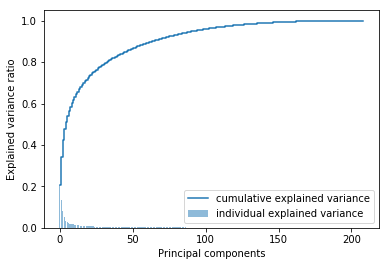

In [40]:
#plot
import matplotlib.pyplot as plt
plt.bar(range(len(eigen_vals)),var_exp,alpha=0.5, label='individual explained variance')
plt.step(range(len(eigen_vals)), cum_var_exp, where='post', label='cumulative explained variance') 
plt.ylabel('Explained variance ratio') 
plt.xlabel('Principal components') 
plt.legend(loc='best') 
plt.show()

In [46]:
#as the plot says, less than 50 PCs can explain 80% of the varaince
from sklearn.decomposition import PCA
pca=PCA(n_components=20)
X_pca=pca.fit_transform(X)
X_pca.shape

(552, 20)